### Check if ML data from MOM6 looks great

In [6]:
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt
from datatree import DataTree
from datatree import open_datatree

import xgcm

In [9]:
data_bucket = 'gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/res4km_sponge10day/'

In [10]:
# Open all the datasets
Lkey = ['50', '100', '200', '400']

ds = {}
for L in Lkey:
    
    ds_temp = xr.open_zarr(f'{data_bucket}ml_data_'+L+'km.zarr')
    
    ds[L] = ds_temp
ds_tree = DataTree.from_dict(ds)

In [29]:
ds_50km = xr.open_zarr(f'{data_bucket}ml_data_'+'50'+'km.zarr')
ds_100km = xr.open_zarr(f'{data_bucket}ml_data_'+'100'+'km.zarr')
ds_200km = xr.open_zarr(f'{data_bucket}ml_data_'+'200'+'km.zarr')
ds_400km = xr.open_zarr(f'{data_bucket}ml_data_'+'400'+'km.zarr')

In [33]:
ds_50km

<xarray.Dataset>
Dimensions:    (Time: 360, zl: 2, yh: 200, xh: 150, zi: 3)
Coordinates:
  * Time       (Time) object 0001-01-11 00:00:00 ... 0010-11-10 00:00:00
  * xh         (xh) float64 4.0 12.0 20.0 28.0 ... 1.18e+03 1.188e+03 1.196e+03
  * yh         (yh) float64 4.0 12.0 20.0 28.0 ... 1.58e+03 1.588e+03 1.596e+03
  * zi         (zi) float64 1.03e+03 1.032e+03 1.034e+03
  * zl         (zl) float64 1.031e+03 1.033e+03
Data variables: (12/20)
    dudx       (Time, zl, yh, xh) float32 dask.array<chunksize=(90, 1, 50, 75), meta=np.ndarray>
    dudy       (Time, zl, yh, xh) float32 dask.array<chunksize=(90, 1, 50, 75), meta=np.ndarray>
    dvdx       (Time, zl, yh, xh) float32 dask.array<chunksize=(90, 1, 50, 75), meta=np.ndarray>
    dvdy       (Time, zl, yh, xh) float32 dask.array<chunksize=(90, 1, 50, 75), meta=np.ndarray>
    e          (Time, zi, yh, xh) float32 dask.array<chunksize=(90, 1, 50, 75), meta=np.ndarray>
    h          (Time, zl, yh, xh) float64 dask.array<chunksize=(90, 1, 50, 38), meta=np.ndarray>
    ...         ...
    vbar_hbar  (Time, zl, yh, xh) float64 dask.array<chunksize=(90, 1, 50, 38), meta=np.ndarray>
    vh         (Time, zl, yh, xh) float64 dask.array<chunksize=(90, 1, 50, 38), meta=np.ndarray>
    vh_bar     (Time, zl, yh, xh) float64 dask.array<chunksize=(90, 1, 50, 38), meta=np.ndarray>
    vh_sg      (Time, zl, yh, xh) float64 dask.array<chunksize=(90, 1, 50, 38), meta=np.ndarray>
    Vbar_LS    (Time, zl, yh) float64 dask.array<chunksize=(90, 1, 50), meta=np.ndarray>
    Vbar_SS    (Time, zl, yh) float64 dask.array<chunksize=(90, 1, 50), meta=np.ndarray>

In [37]:
def compute_overturning_metrics(ds_filt): 
    dx = ds_filt.xh.diff('xh')[0].values*1e3
    m3_to_Sv = 1e-6
    
    ds_filt['Vbar_LS'] = ds_filt['vbar_hbar'].sum('xh')*m3_to_Sv*dx
    ds_filt['Vbar_SS'] = ds_filt['vh_sg'].sum('xh')*m3_to_Sv*dx
    
    return ds_filt

In [38]:
ds_50km = compute_overturning_metrics(ds_50km)
ds_100km = compute_overturning_metrics(ds_100km)
ds_200km = compute_overturning_metrics(ds_200km)
ds_400km = compute_overturning_metrics(ds_400km)

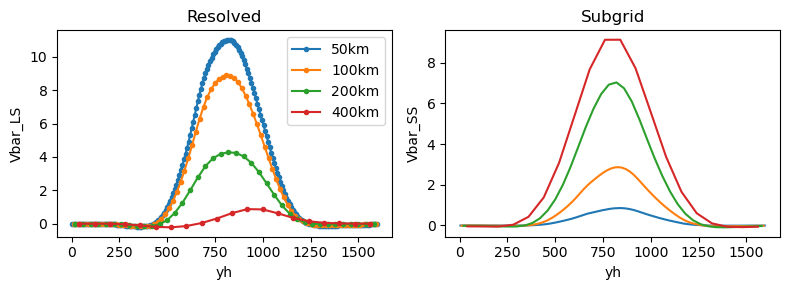

In [42]:
plt.figure(figsize=(8,3))

plt.subplot(121)
ds_50km.Vbar_LS.mean('Time').isel(zl=0).plot(label='50km',marker='.')
ds_100km.Vbar_LS.mean('Time').isel(zl=0).plot(label='100km',marker='.')
ds_200km.Vbar_LS.mean('Time').isel(zl=0).plot(label='200km',marker='.')
ds_400km.Vbar_LS.mean('Time').isel(zl=0).plot(label='400km',marker='.')
plt.legend()
plt.title('Resolved')

plt.subplot(122)
ds_50km.Vbar_SS.mean('Time').isel(zl=0).plot()
ds_100km.Vbar_SS.mean('Time').isel(zl=0).plot()
ds_200km.Vbar_SS.mean('Time').isel(zl=0).plot()
ds_400km.Vbar_SS.mean('Time').isel(zl=0).plot()
plt.title('Subgrid')

plt.tight_layout()

Looks good. 